# Matplotlib

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/javism/fi2022-2023/blob/main/practica07/practica07_matplotlib.ipynb)

[Matplotlib](https://matplotlib.org/) es una completa biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Si usas python en conda lo habitual es que esté instalada por defecto. 

Instalación con conda: 
```
conda install matplotlib
```

Instalación con pip: 
```
pip install matplotlib
```

La documentación oficial es muy completa y tiene organizados tutoriales por niveles de dificultad en https://matplotlib.org/stable/tutorials/index.html. Echa un vistazo:
* [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) (este es suficiente para la asignatura)
* [Galería de ejemplos](https://matplotlib.org/stable/gallery/index.html)


## Gáfico básico

Primer gráfico de ejemplo (el eje x se genera automáticamente si no se pasa un vector):

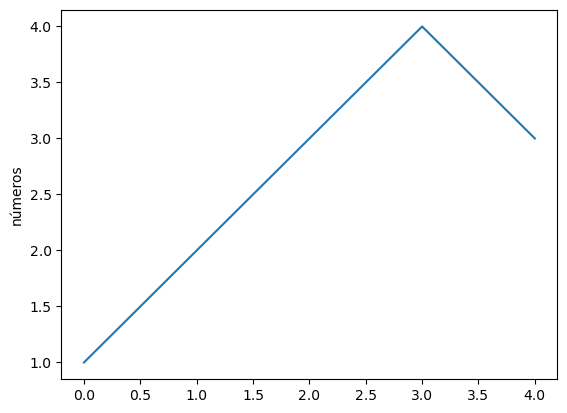

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 3])
plt.ylabel('números')
plt.show()

`plot` es una función versátil, que acepta un número arbitrario de argumentos. Por ejemplo, para trazar x frente a y, puede escribir:

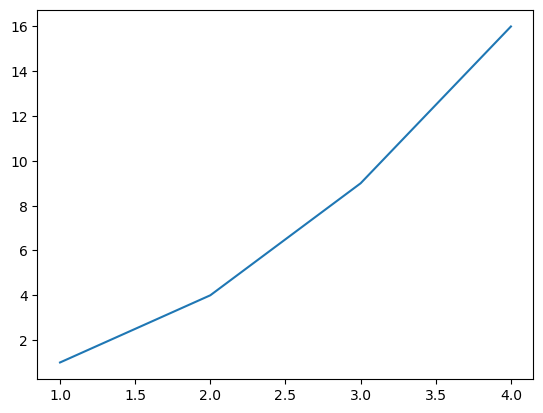

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formato gráficos

Para cada par de argumentos x, y, hay un tercer argumento opcional que es la cadena de formato que indica el color y el tipo de línea del gráfico

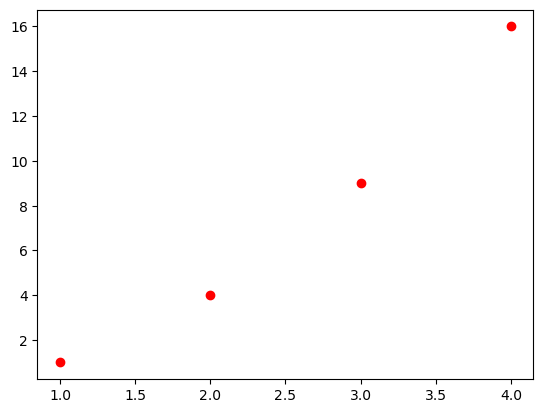

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

Por defecto se usa la línea en azul, que se especifica con 'b-'. Esto genera el mismo efecto que no ponerlo. Puedes ver todas las opciones de formato de puntos, líneas y colores aquí:
* https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html


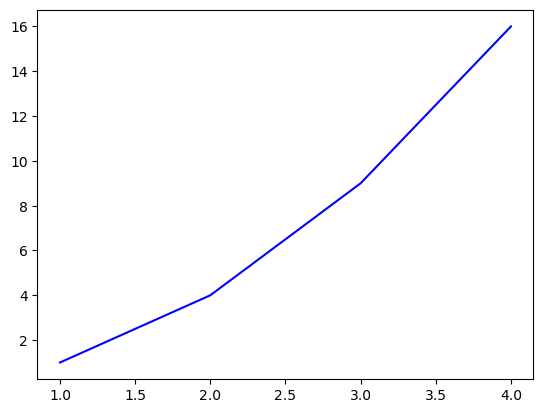

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'b-')

## Series de datos como np.array

El tipo de dato más natural para dibujar es el array de numpy. El siguiente ejemplo dibuja varias funciones con diferentes estilo. Observa que siempre tenemos los argumentos de 3 en 3 (x, y, estilo) para cada serie de datos. 

Ejercicios: 
* Prueba a cambiar colores y a añadir una cuarta serie de datos con otra función, por ejemplo: `t, 40+20*np.sin(t*10), 'y-'`
* Cambia los parámetros de arange para ver diferentes efectos. 
* Se pueden dibujar varias series en la misma llamada a plot o en sucesivas que se dibujan sobre la misma figura. 



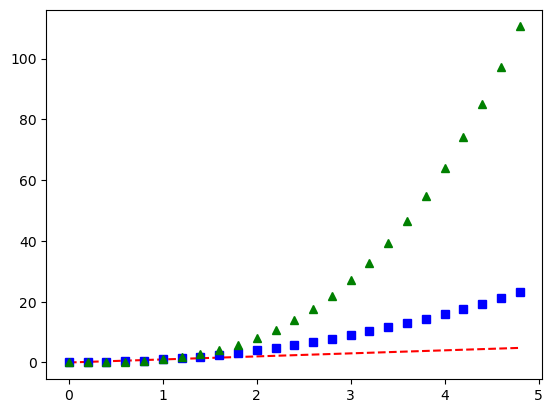

In [5]:
import numpy as np

# Genera datos uniformemente distribuídos entre 0 y 5 en intervaloes de 0.2
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

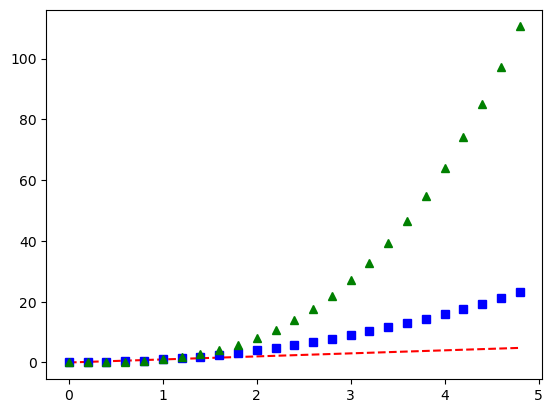

In [6]:
import numpy as np

# Genera datos uniformemente distribuídos entre 0 y 5 en intervaloes de 0.2
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
t = np.arange(0., 5., 0.2)
plt.show()

## Trabajo con variables categóricas

<BarContainer object of 3 artists>

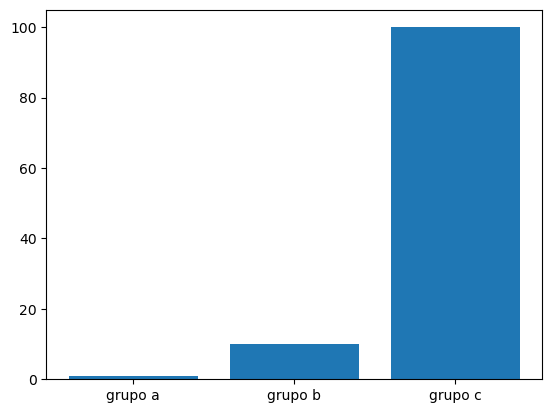

In [7]:
names = ['grupo a', 'grupo b', 'grupo c']
values = [1, 10, 100]

plt.bar(names, values)

Varias llamadas a plot() dibujan sobre la misma figura. Si queremos hacer varios dibujos tendremos que usar `plt.subplot()` o generar una gráfica nueva sucesivamente llamando a `plt.figure()`. 

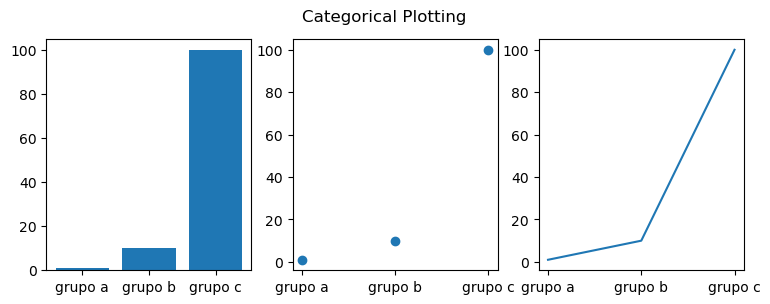

In [8]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Histogramas

Los histogramas son una forma de visualizar rápidamente una variable aleatoria. En este ejemplo generamos datos aleatorios con una distribución uniforme y luego con una distribución normal. 

A veces nos interesará superponer datos en la misma gráfica. En el ejemplo usamos la transparencia (`alpha=0.5`) para poder comparar. Si descomentas plt.figure() verás que se generan dos gráficas distintas. 

(array([ 4.,  5., 11., 14., 16., 21.,  9., 12.,  5.,  3.]),
 array([-1.14502   ,  0.16288939,  1.47079879,  2.77870818,  4.08661758,
         5.39452697,  6.70243637,  8.01034576,  9.31825515, 10.62616455,
        11.93407394]),
 <BarContainer object of 10 artists>)

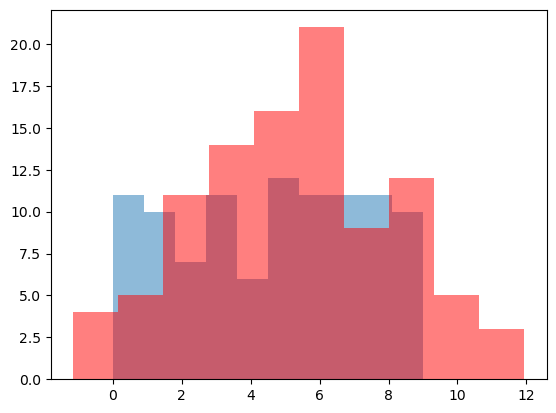

In [9]:
# Si no descomentas plt.figure() los gráficos se superponen en vez de dibujarse en figuras independientes
#plt.figure()
x1 = np.random.randint(0,10,100)
x2 = np.random.normal(5,3,100)
plt.hist(x1, alpha=0.5)
#plt.figure()
plt.hist(x2,color='red', alpha=0.5)

## Dibujando varias funciones y exportar gráficos a un fichero

A continuación vamos a dibujar funciones de distintas formas. Podemos definir una función auxiliar para el dibujo, o, como hemos hecho antes, incluir la fórmula en el lugar donde iría el valor y. Además vamos a hacer uso de `legend` y `title` para anotar los datos. 

Exportar los datos a un fichero es tan fácil como escribir lo siguiente: 

```python
fig = plt.figure(...)
# Código de dibujo
...
fig.savefig('nombre.extension')
```

Esta función permite varios parámetros en función del tipo de gráfico, por ejemplo para PNG `dpi=600` se refiere a la resolución de la imagen. 

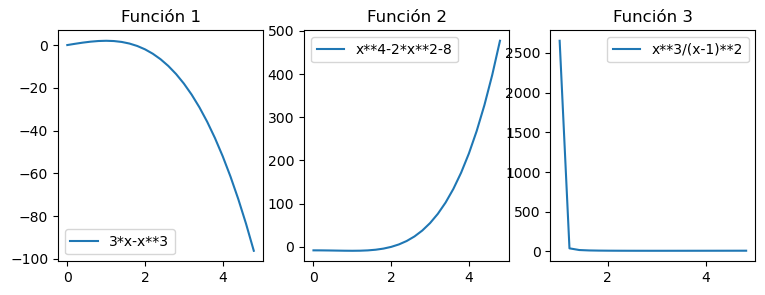

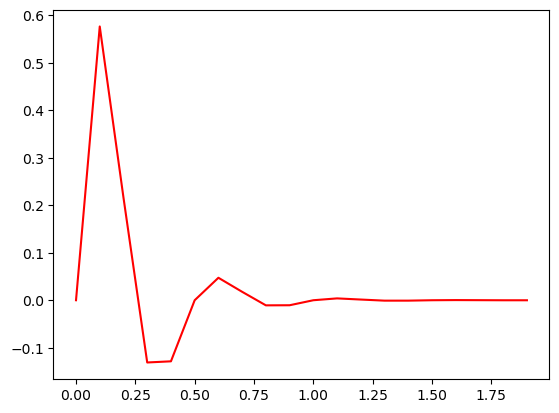

In [16]:
def f1(x):
    return (3*x-x**3)

def fc1(x):
    return np.sin(4*np.pi*x)*np.exp(-5*x)

t = np.arange(0., 5., 0.2)

fig = plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.plot(t, f1(t))
plt.title('Función 1')
plt.legend(['3*x-x**3'])

plt.subplot(132)
plt.plot(t, (t**4-2*t**2-8))
plt.title('Función 2')
plt.legend(['x**4-2*x**2-8'])

t = np.arange(1.02, 5., 0.2)
plt.subplot(133)
plt.plot(t, (t**3/(t-1)**2))
plt.title('Función 3')
plt.legend(['x**3/(x-1)**2'])
#plt.suptitle('3 funciones')
plt.show()
fig.savefig('varias_funciones.png')
fig.savefig('varias_funciones_alta.png', dpi=600)
 
fig = plt.figure()
t = np.arange(0., 2., 0.1) # Prueba a cambiar estos parámetros para que la gráfica se dibuje como quieras
plt.plot(t, fc1(t), 'r')
fig.savefig('una_funcion.pdf')


## Visualizar imágenes